In [ ]:
import efel

from bluepy.v2 import Simulation

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle


In [ ]:
mean_freq = 'mean_frequency'

In [ ]:
efel.getFeatureNames()

In [2]:
# volumes
vols = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/cells_volume_calc/volumes_2020113012.txt",sep='\,\s',header=None)


#out_data = [c_gid]
#out_data.append(rank)
#out_data.append(cells_volumes[c_gid])
#out_data.append(cells_areas[c_gid])
#param_outputfile.write(", ".join([str(p) for p in out_data]))

vols.columns = ['c_gid','rank','cells_volumes_um3','cells_areas']
vols['c_gid'] = vols['c_gid'].astype(int)

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [2]:
#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim_noextras_26nov2020/BlueConfig')
#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_nostim_noext_halfIonUpd/BlueConfig')
#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim_noextras/BlueConfig')


# thal in vivo from 1k to 4k
#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_newThalStim/BlueConfig')

sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_inasum/BlueConfig')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run


In [4]:
# mc2
# 5 sec

# um with full met, no stim, no extras
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_nostim_noextras_26nov2020_2020112621.txt",header=None)

#met_gen_nostim_noext_halfIonUpd
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_nostim_noext_halfIonUpd_2020112710.txt",header=None)


# um with gen met: met_general
# Calv no layers
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_2020111812.txt",header=None)

# thal in vivo from 1k to 4k
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_met_gen_newThalStim_2020120119.txt",header=None)


In [6]:
#param = [current_ina[c_gid], 0.06, -73.0, nais_mean[c_gid], 139.0, current_ik[c_gid], 4.1, pAKTPFK2, atpi_mean[c_gid],vm[27],cais_mean[c_gid],mito_scale,glutamatergic_gaba_scaling]

params_from_ndam = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/param_p150_met_gen_newThalStim_2020120119.txt",header=None)

params_from_ndam_colnames = ['c_gid','rank','idxm','current_ina', 'const006', 'const_73', 'nais_mean', 'const139','current_ik', 'const41', 'pAKTPFK2', 'atpi_mean','constvm27','cais_mean','mito_scale','glutamatergic_gaba_scaling']

params_from_ndam.columns =  params_from_ndam_colnames


In [7]:
len(params_from_ndam)

114590

In [8]:
params_from_ndam.head()

,c_gid,rank,idxm,current_ina,const006,const_73,nais_mean,const139,current_ik,const41,pAKTPFK2,atpi_mean,constvm27,cais_mean,mito_scale,glutamatergic_gaba_scaling
0,39.0,6,0,0.18766793770254872,0.06,-73.0,10.244040477245571,139.0,0.10803810536362665,4.1,0.17,0.3521652209132262,0.3521652209132262,7.052627122654653e-05,0.593023,1.0
1,313.0,36,0,-29.332221629846075,0.06,-73.0,13.583698659640874,139.0,43.38433893044487,4.1,0.17,0.0829264648977511,0.0829264648977511,0.00012409110998803008,0.826873,0.1
2,2327.0,328,0,-2.168914016943759,0.06,-73.0,13.53490256525367,139.0,3.5026406533234,4.1,0.17,0.07314012124014127,0.07314012124014127,0.00018348406662925992,0.826873,0.1
3,2924.0,406,0,-0.49014077248268584,0.06,-73.0,13.193866383283904,139.0,0.9522525414933103,4.1,0.17,0.04523475435417311,0.04523475435417311,0.00017504005918289017,0.826873,0.1
4,3646.0,514,0,-0.10706407111791978,0.06,-73.0,13.433079922126739,139.0,0.736298283478955,4.1,0.17,0.05781652320012886,0.05781652320012886,0.00015285280590460274,0.826873,0.1


In [9]:

params_from_ndam['current_ina'] = params_from_ndam['current_ina'].astype(float)
params_from_ndam['atpi_mean'] = params_from_ndam['atpi_mean'].astype(float)

In [10]:

params_from_ndam['c_gid'] = params_from_ndam['c_gid'].astype(int)

In [11]:
params_from_ndam = params_from_ndam.dropna()

In [19]:
len(params_from_ndam)

114531

In [20]:
np.corrcoef(params_from_ndam['current_ina'],params_from_ndam['atpi_mean'])

array([[1.        , 0.03567255],
       [0.03567255, 1.        ]])

In [ ]:
# For every ATP molecule that the pump uses, three sodium ions are exported and two potassium ions are imported

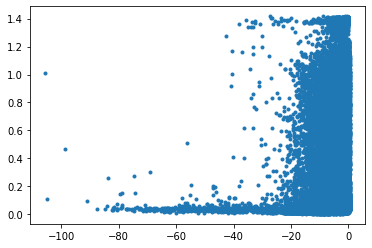

In [21]:
plt.plot(params_from_ndam['current_ina'],params_from_ndam['atpi_mean'], marker='.', linestyle='')

plt.show()

In [12]:
params_from_ndam.index = params_from_ndam['c_gid']

In [13]:
um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi","ksi_ephys"]
print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')


40


In [ ]:
um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi", "ksi_ephys", "G6P_n", "F6P_n", "G6P_a", "F6P_a", "FBP_n", "FBP_a", "AMP_a", "GAP_n", "DHAP_n", "GAP_a", "DHAP_a", "Pi_n", "BPG13_n", "Pi_a", "BPG13_a", "PG3_n", "PG3_a", "PG2_n", "PG2_a", "PEP_n", "PEP_a", "G1P_a", "GLY_a", "UDPgluco", "UTP", "PP1_a", "GS_a", "GPa_a", "GPb_a", "cAMP_a", "PKAa_a", "PKAb_a", "PHKa_a", "R2CcAMP2_a", "R2CcAMP4_a", "K_a0", "Na_a0", "Va0", "Ca_a", "GLUT_out", "GLUT_a", "GLN_out", "GLN_a", "GLUT_syn", "f26bp_a0", "f26bp_n0", "PYRmito_n0", "CITmito_n0", "ISOCITmito_n0", "AKGmito_n0", "SUCCOAmito_n0", "SUCmito_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "AcCoAmito_n0", "CoAmito_n0", "NADmito_n0", "NADHmito_n0", "CaMito_n0", "ADPmito_n0", "ATPmito_n0", "Pimito_n0", "Qmito_n0", "QH2mito_n0", "CytCredmito_n0", "CytCoxmito_n0", "ASPmito_n0", "GLUmito_n0", "MAL_n0", "OXA_n0", "ASP_n0", "AKG_n0", "GL6P_n0", "GO6P_n0", "NADP_n0", "NADPH_n0", "RU5P_n0", "X5P_n0", "R5P_n0", "S7P_n0", "E4P_n0", "PYRmito_a", "CITmito_a", "ISOCITmito_a", "AKGmito_a", "SUCCOAmito_a", "SUCmito_a", "FUMmito_a", "MALmito_a", "OXAmito_a", "AcCoAmito_a", "CoAmito_a", "NADmito_a", "NADHmito_a", "CaMito_a", "ADPmito_a", "ATPmito_a", "Pimito_a", "Qmito_a", "QH2mito_a", "CytCredmito_a", "CytCoxmito_a", "ASPmito_a", "GLUmito_a", "MAL_a", "OXA_a", "ASP_a", "AKG_a", "GL6P_a", "GO6P_a", "NADP_a", "NADPH_a", "RU5P_a", "X5P_a", "R5P_a", "S7P_a", "E4P_a", "GSH_a", "GSSG_a", "GSH_n", "GSSG_n", "MitoMembrPotent_a", "MitoMembrPotent_n", "GLU_n", "NEneuromod", "AMP_n", "GLN_n", "GABA_inh_n","Vv","dHb"]

print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')


In [14]:
um = um.rename(columns={"with_met_c_gid":"c_gid",
                        "with_met_mpi_rank":"mpi_rank",
                        "with_met_idxm":"idxm"})

In [15]:
um.index = um['c_gid']

In [16]:
um_main = um[['c_gid','idxm','with_met_ATP_n']].copy()
print(len(um_main))

um_main = um_main.loc[um_main['with_met_ATP_n'] != " nan",:]

print(len(um_main))

um_main['with_met_ATP_n'] = um_main['with_met_ATP_n'].astype(float)

um_main = um_main.reset_index(drop=True)

um_main_g = um_main[['c_gid','with_met_ATP_n']].groupby('c_gid').mean()

um_main_g = um_main_g.reset_index()



114590
114531


In [17]:
np.max(um_main['with_met_ATP_n'])

1.4273262494547991

In [2]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO,Cell.LAYER,Cell.MORPH_CLASS])

onepercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/mc2_onepercent_allLayers_EXCandINH_gids.txt")
onepercent = mc2_cells.loc[onepercent_gids,:]

In [19]:
vols.index = vols['c_gid']

vols_coords = pd.merge(mc2_cells, vols, left_index=True,right_index=True, how='inner')


In [6]:
y_min_L1 = vols_coords.loc[vols_coords['layer']==1,'y'].min() 
y_max_L1 = vols_coords.loc[vols_coords['layer']==1,'y'].max()

y_min_L2 = vols_coords.loc[vols_coords['layer']==2,'y'].min() 
y_max_L2 = vols_coords.loc[vols_coords['layer']==2,'y'].max()

y_min_L3 = vols_coords.loc[vols_coords['layer']==3,'y'].min() 
y_max_L3 = vols_coords.loc[vols_coords['layer']==3,'y'].max()

y_min_L4 = vols_coords.loc[vols_coords['layer']==4,'y'].min() 
y_max_L4 = vols_coords.loc[vols_coords['layer']==4,'y'].max()

y_min_L5 = vols_coords.loc[vols_coords['layer']==5,'y'].min() 
y_max_L5 = vols_coords.loc[vols_coords['layer']==5,'y'].max()

y_min_L6 = vols_coords.loc[vols_coords['layer']==6,'y'].min() 
y_max_L6 = vols_coords.loc[vols_coords['layer']==6,'y'].max()

###

x_min_L1 = vols_coords.loc[vols_coords['layer']==1,'x'].min() 
x_max_L1 = vols_coords.loc[vols_coords['layer']==1,'x'].max()

x_min_L2 = vols_coords.loc[vols_coords['layer']==2,'x'].min() 
x_max_L2 = vols_coords.loc[vols_coords['layer']==2,'x'].max()

x_min_L3 = vols_coords.loc[vols_coords['layer']==3,'x'].min() 
x_max_L3 = vols_coords.loc[vols_coords['layer']==3,'x'].max()

x_min_L4 = vols_coords.loc[vols_coords['layer']==4,'x'].min() 
x_max_L4 = vols_coords.loc[vols_coords['layer']==4,'x'].max()

x_min_L5 = vols_coords.loc[vols_coords['layer']==5,'x'].min() 
x_max_L5 = vols_coords.loc[vols_coords['layer']==5,'x'].max()

x_min_L6 = vols_coords.loc[vols_coords['layer']==6,'x'].min() 
x_max_L6 = vols_coords.loc[vols_coords['layer']==6,'x'].max()

###

z_min_L1 = vols_coords.loc[vols_coords['layer']==1,'z'].min() 
z_max_L1 = vols_coords.loc[vols_coords['layer']==1,'z'].max()

z_min_L2 = vols_coords.loc[vols_coords['layer']==2,'z'].min() 
z_max_L2 = vols_coords.loc[vols_coords['layer']==2,'z'].max()

z_min_L3 = vols_coords.loc[vols_coords['layer']==3,'z'].min() 
z_max_L3 = vols_coords.loc[vols_coords['layer']==3,'z'].max()

z_min_L4 = vols_coords.loc[vols_coords['layer']==4,'z'].min() 
z_max_L4 = vols_coords.loc[vols_coords['layer']==4,'z'].max()

z_min_L5 = vols_coords.loc[vols_coords['layer']==5,'z'].min() 
z_max_L5 = vols_coords.loc[vols_coords['layer']==5,'z'].max()

z_min_L6 = vols_coords.loc[vols_coords['layer']==6,'z'].min() 
z_max_L6 = vols_coords.loc[vols_coords['layer']==6,'z'].max()

In [7]:
x_min_allL = vols_coords['x'].min()
x_max_allL = vols_coords['x'].max()

In [8]:
z_min_allL = vols_coords['z'].min()
z_max_allL = vols_coords['z'].max()

In [9]:
average_a = ((x_max_allL-x_min_allL)+(z_max_allL-z_min_allL))/2

In [10]:
vol_1 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L1-y_min_L1)
vol_2 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L2-y_min_L2)
vol_3 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L3-y_min_L3)
vol_4 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L4-y_min_L4)
vol_5 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L5-y_min_L5)
vol_6 = 3*np.sqrt(3)/2*(average_a**2)*(y_max_L6-y_min_L6)

In [11]:
santuy = pd.DataFrame(columns=['layer','percent'])
santuy = santuy.append({'layer':1,'percent':93.23}, ignore_index=True)
santuy = santuy.append({'layer':2,'percent':77.39}, ignore_index=True)
santuy = santuy.append({'layer':3,'percent':80.12}, ignore_index=True)
santuy = santuy.append({'layer':4,'percent':78.10}, ignore_index=True)
santuy = santuy.append({'layer':5,'percent':80.52}, ignore_index=True)
santuy = santuy.append({'layer':6,'percent':79.10}, ignore_index=True)
santuy

,layer,percent
0,1.0,93.23
1,2.0,77.39
2,3.0,80.12
3,4.0,78.10
4,5.0,80.52
5,6.0,79.10


In [12]:
sum_vol_1 = np.sum(vols_coords.loc[vols_coords['layer']==1,'cells_volumes_um3'])
sum_vol_2 = np.sum(vols_coords.loc[vols_coords['layer']==2,'cells_volumes_um3'])
sum_vol_3 = np.sum(vols_coords.loc[vols_coords['layer']==3,'cells_volumes_um3'])
sum_vol_4 = np.sum(vols_coords.loc[vols_coords['layer']==4,'cells_volumes_um3'])
sum_vol_5 = np.sum(vols_coords.loc[vols_coords['layer']==5,'cells_volumes_um3'])
sum_vol_6 = np.sum(vols_coords.loc[vols_coords['layer']==6,'cells_volumes_um3'])

In [13]:
vols_coords_sum = pd.DataFrame(columns=['layer','sum_volume_um3'])

vols_coords_sum = vols_coords_sum.append({'layer':1,'sum_volume_um3':sum_vol_1}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':2,'sum_volume_um3':sum_vol_2}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':3,'sum_volume_um3':sum_vol_3}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':4,'sum_volume_um3':sum_vol_4}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':5,'sum_volume_um3':sum_vol_5}, ignore_index=True)
vols_coords_sum = vols_coords_sum.append({'layer':6,'sum_volume_um3':sum_vol_6}, ignore_index=True)

In [14]:
santuy_y = pd.merge(santuy,vols_coords_sum,left_on='layer',right_on='layer',how='inner')

santuy_y['cells_volumes_percent'] = None

santuy_y.loc[santuy_y['layer']==1,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==1,'sum_volume_um3']/vol_1
santuy_y.loc[santuy_y['layer']==2,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==2,'sum_volume_um3']/vol_2
santuy_y.loc[santuy_y['layer']==3,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==3,'sum_volume_um3']/vol_3
santuy_y.loc[santuy_y['layer']==4,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==4,'sum_volume_um3']/vol_4
santuy_y.loc[santuy_y['layer']==5,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==5,'sum_volume_um3']/vol_5
santuy_y.loc[santuy_y['layer']==6,'cells_volumes_percent'] = 100*santuy_y.loc[santuy_y['layer']==6,'sum_volume_um3']/vol_6


santuy_y['y'] = None

santuy_y.loc[santuy_y['layer']==1,'y'] = 1
santuy_y.loc[santuy_y['layer']==2,'y'] = 2
santuy_y.loc[santuy_y['layer']==3,'y'] = 3
santuy_y.loc[santuy_y['layer']==4,'y'] = 4
santuy_y.loc[santuy_y['layer']==5,'y'] = 5
santuy_y.loc[santuy_y['layer']==6,'y'] = 6


In [15]:
santuy_y

,layer,percent,sum_volume_um3,cells_volumes_percent,y
0,1.0,93.23,1.072083e+06,1.54092,1
1,2.0,77.39,2.145156e+07,30.5203,2
2,3.0,80.12,2.627310e+07,15.569,3
3,4.0,78.10,3.562039e+07,39.9832,4
4,5.0,80.52,1.559279e+08,63.9349,5
5,6.0,79.10,8.271679e+07,25.562,6


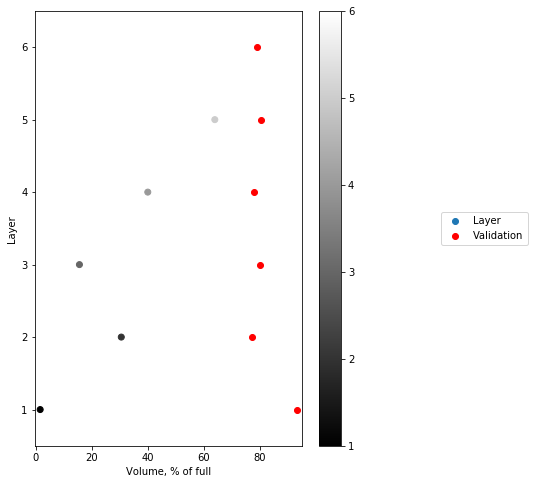

In [21]:
fig = plt.figure(figsize=(6, 8))


vmin=np.min(santuy_y['layer'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(santuy_y['layer'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())


#fig, ax = plt.subplots(figsize=(6, 8))

x_min = np.min(santuy_y['cells_volumes_percent'].tolist() + santuy_y['percent'].tolist() ) #mc2_cells[Cell.X].max()
x_max = np.max(santuy_y['cells_volumes_percent'].tolist() + santuy_y['percent'].tolist() ) #mc2_cells[Cell.X].min()

y_min = santuy_y['y'].min() 
y_max = santuy_y['y'].max()

#L1min = np.min(santuy_y.loc[santuy_y['layer']==1,'y'])
#L1max = np.max(santuy_y.loc[santuy_y['layer']==1,'y'])

#L2min = np.min(santuy_y.loc[santuy_y['layer']==2,'y'])
#L2max = np.max(santuy_y.loc[santuy_y['layer']==2,'y'])

#L3min = np.min(santuy_y.loc[santuy_y['layer']==3,'y'])
#L3max = np.max(santuy_y.loc[santuy_y['layer']==3,'y'])

#L4min = np.min(santuy_y.loc[santuy_y['layer']==4,'y'])
#L4max = np.max(santuy_y.loc[santuy_y['layer']==4,'y'])

#L5min = np.min(santuy_y.loc[santuy_y['layer']==5,'y'])
#L5max = np.max(santuy_y.loc[santuy_y['layer']==5,'y'])

#L6min = np.min(santuy_y.loc[santuy_y['layer']==6,'y'])
#L6max = np.max(santuy_y.loc[santuy_y['layer']==6,'y'])

#ax1 = plt.axhspan(L1min,L1max, color='#e5e5e5', label='L1', alpha=0.5,lw=0,zorder = 0)
#ax2 = plt.axhspan(L2min,L2max, color='#d8d8d8', label='L2', alpha=0.5,lw=0,zorder = 0)
#ax3 = plt.axhspan(L3min,L3max, color='#cccccc', label='L3', alpha=0.5,lw=0,zorder = 0)
#ax4 = plt.axhspan(L4min,L4max, color='#bfbfbf', label='L4', alpha=0.5,lw=0,zorder = 0)
#ax5 = plt.axhspan(L5min,L5max, color='#b2b2b2', label='L5', alpha=0.5,lw=0,zorder = 0)
#ax6 = plt.axhspan(L6min,L6max, color='#a6a6a6', label='L6', alpha=0.5,lw=0,zorder = 0)


ax1v = plt.scatter(santuy_y['cells_volumes_percent'], santuy_y['y'], c=santuy_y['layer'], vmin=vmin, vmax=vmax, cmap='gist_gray', label='Layer',zorder = 1) #cmap=cmap, 

axTheor = plt.scatter(santuy_y['percent'], santuy_y['y'], c='red',label='Validation',zorder = 2) #cmap=cmap, 



plt.ylabel('Layer')
#plt.ylabel('y (um)')
plt.xlabel('Volume, % of full')

plt.xlim([x_min - 2, x_max+2])
plt.ylim([y_min -0.5, y_max+0.5])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax1v)

plt.show()
#fig.savefig(f'plots/mc2_volumes_percent_withSantuy_30nov2020.png',dpi=300, bbox_inches='tight', transparent=True)


In [ ]:
fig = plt.figure(figsize=(6, 8))


vmin=np.min(vols_coords['layer'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(vols_coords['layer'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())


#fig, ax = plt.subplots(figsize=(6, 8))

x_min = np.min(vols_coords['cells_volumes_um3'].tolist()) #mc2_cells[Cell.X].max()
x_max = np.max(vols_coords['cells_volumes_um3'].tolist()) #mc2_cells[Cell.X].min()

y_min = mc2_cells[Cell.Y].min() 
y_max = mc2_cells[Cell.Y].max()

L1min = np.min(vols_coords.loc[vols_coords['layer']==1,'y'])
L1max = np.max(vols_coords.loc[vols_coords['layer']==1,'y'])

L2min = np.min(vols_coords.loc[vols_coords['layer']==2,'y'])
L2max = np.max(vols_coords.loc[vols_coords['layer']==2,'y'])

L3min = np.min(vols_coords.loc[vols_coords['layer']==3,'y'])
L3max = np.max(vols_coords.loc[vols_coords['layer']==3,'y'])

L4min = np.min(vols_coords.loc[vols_coords['layer']==4,'y'])
L4max = np.max(vols_coords.loc[vols_coords['layer']==4,'y'])

L5min = np.min(vols_coords.loc[vols_coords['layer']==5,'y'])
L5max = np.max(vols_coords.loc[vols_coords['layer']==5,'y'])

L6min = np.min(vols_coords.loc[vols_coords['layer']==6,'y'])
L6max = np.max(vols_coords.loc[vols_coords['layer']==6,'y'])

ax1 = plt.axhspan(L1min,L1max, color='#e5e5e5', label='L1', alpha=0.5,lw=0,zorder = 0)
ax2 = plt.axhspan(L2min,L2max, color='#d8d8d8', label='L2', alpha=0.5,lw=0,zorder = 0)
ax3 = plt.axhspan(L3min,L3max, color='#cccccc', label='L3', alpha=0.5,lw=0,zorder = 0)
ax4 = plt.axhspan(L4min,L4max, color='#bfbfbf', label='L4', alpha=0.5,lw=0,zorder = 0)
ax5 = plt.axhspan(L5min,L5max, color='#b2b2b2', label='L5', alpha=0.5,lw=0,zorder = 0)
ax6 = plt.axhspan(L6min,L6max, color='#a6a6a6', label='L6', alpha=0.5,lw=0,zorder = 0)

#ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
#ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
#ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
#ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
#ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
#ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 

axv = plt.scatter(vols_coords['cells_volumes_um3'], vols_coords['y'], c=vols_coords['layer'], vmin=vmin, vmax=vmax, label='Layer',zorder = 1) #cmap=cmap, 

plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('Volume (um^3)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+400])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()
#fig.savefig(f'plots/mc2_volumes_um3_30nov2020.png',dpi=300, bbox_inches='tight', transparent=True)


In [20]:
# python getMeanFreq.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/BlueConfig ../out_data/soma_vmv_met_full_thal_23nov2020.pickle

#with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_nomet_nostim_noextras.pickle', 'rb') as handle:

#with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_nostim_noextras_26nov2020.pickle', 'rb') as handle:
#with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_gen_nostim_noext_halfIonUpd.pickle', 'rb') as handle:
with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_gen_newThalStim_1dec2020.pickle', 'rb') as handle:
    feature_values = pickle.load(handle)
    
    
#with open('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_gen_inasum.pickle', 'rb') as handle:
#    feature_values = pickle.load(handle)

In [32]:
np.max(list(feature_values.values()))

285.71428571428555

In [21]:

fr = pd.DataFrame(feature_values.items(),columns = ['c_gid','mean_frequency'])

fr['c_gid']=fr['c_gid'].astype(int)

In [22]:
um_main_g['c_gid']=um_main_g['c_gid'].astype(int)


In [23]:
combo = pd.merge(um_main_g, fr, left_on='c_gid',right_on='c_gid',how="inner")

combo.index = combo['c_gid']
combo = combo.drop(columns='c_gid')

In [24]:
# with um run:
combo_feat1 = pd.merge(params_from_ndam, combo, left_index=True,right_index=True, how='inner') 
combo_feat = pd.merge(mc2_cells, combo_feat1, left_index=True,right_index=True, how='inner') # or onepercent instead of mc2_cells


# no um run:
#fr.index = fr['c_gid']
#combo_feat = pd.merge(mc2_cells, fr, left_index=True,right_index=True, how='inner') # or onepercent instead of mc2_cells

In [25]:
combo_feat['with_met_ATP_n'] = combo_feat['with_met_ATP_n'].astype(float)

In [126]:
# test script 

percent_gids = '1'
circuit_f = '/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig'
onepercent_gids_f = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_onepercent_allLayers_EXCandINH_gids.txt'
tenpercent_gids_f = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_tenpercent_allLayers_EXCandINH_gids.txt'

def get_cells(circuit_f,percent_gids,onepercent_gids_f,tenpercent_gids_f):
    c = Circuit(circuit_f)
    mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.ETYPE,Cell.MTYPE])
    mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

    if percent_gids is '1':
        percent_gids = np.loadtxt(onepercent_gids_f)
    elif percent_gids is '10':
        percent_gids = np.loadtxt(tenpercent_gids_f)
    subset_cells = mc2_cells.loc[percent_gids,:]
    subset_cells['etype_mtype'] = subset_cells['etype'].astype(str) + "_" + subset_cells['mtype'].astype(str)

    return subset_cells


subset_cells = get_cells(circuit_f,percent_gids,onepercent_gids_f,tenpercent_gids_f)

subset_cells.index = subset_cells.index.astype(int)

subset_cells = subset_cells.reset_index()

subset_cells = subset_cells.rename(columns={'index':'c_gid'})

subset_cells.head()

,c_gid,x,y,z,synapse_class,layer,etype,mtype,etype_mtype
0,109,568.072782,2023.518930,557.214067,INH,1,bNAC,L1_DAC,bNAC_L1_DAC
1,1262,483.753358,1684.888352,602.558669,EXC,3,cADpyr,L3_TPC:A,cADpyr_L3_TPC:A
2,1625,396.835980,1434.260707,594.458222,EXC,3,cADpyr,L3_TPC:A,cADpyr_L3_TPC:A
3,1936,307.380946,1551.860633,575.372782,EXC,3,cADpyr,L3_TPC:A,cADpyr_L3_TPC:A
4,2300,181.670192,1452.340105,488.035270,EXC,3,cADpyr,L3_TPC:A,cADpyr_L3_TPC:A


In [3]:
len(subset_cells['c_gid'].unique())

230

In [5]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_newThalStim/BlueConfig'

def get_ina(sim_f,subset_cells):
    sim = Simulation(sim_f)
    report = sim.report('NaConcAllCmps', source='h5') ## only for test, this should be ina
    ina_data = report.get()
    print('got rep')
    ina_data = ina_data.reset_index()
    ina_data = ina_data.loc[:,['time'] + subset_cells['c_gid'].tolist()]
    ina_t = ina_data.transpose()
    ina_t.columns = ina_t.loc['time',:]
    ina_t.drop(ina_t.index[0], inplace=True)

    ina_t = ina_t.reset_index()

    return ina_t

In [6]:
ina_t = get_ina(sim_f,subset_cells)

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


got rep


In [66]:
vols_areas_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/cells_volume_calc/volumes_2020113012.txt'
mean_freq_f = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/soma_vmv_met_gen_inasum.pickle'


def get_volumes_areas(vols_areas_f,subset_cells):
    vols_areas = pd.read_csv(vols_areas_f, sep='\,\s',header=None)
    vols_areas.columns = ['gid','rank','cells_volumes_um3','cells_areas']
    vols_areas['gid'] = vols_areas['gid'].astype(int)
    print(len(vols_areas))
    vols_areas = vols_areas.loc[vols_areas['gid'].isin(subset_cells['c_gid'].tolist()),:]
    print(len(vols_areas))
    vols_areas = vols_areas.drop_duplicates(keep='first')
    vols_areas = vols_areas.reset_index(drop=True)
    print(len(vols_areas))
    return vols_areas

def get_mean_freq(mean_freq_f,subset_cells):
    with open(mean_freq_f, 'rb') as handle:
        feature_values = pickle.load(handle)
    fr = pd.DataFrame(feature_values.items(),columns = ['gid','mean_frequency'])
    fr['gid']=fr['gid'].astype(int)
    fr = fr.loc[fr['gid'].isin(subset_cells['c_gid'].tolist()),:]
    fr = fr.reset_index(drop=True)
    return fr

vols_areas = get_volumes_areas(vols_areas_f,subset_cells)
fr = get_mean_freq(mean_freq_f,subset_cells)

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


45836
460
230


In [123]:
# calc ATP from ina like in scirep

Avogadro = 6.02e23 # 1/mol
Faraday = 96485.0 #96.485 # 96485.0  C/mol  # FARADAY = 96485.309 (coul) in Somjen2008
#ina = [mA/cm2] (distributed)  #coulomb in terms of the ampere and second: 1 C = 1 A × 1 s.


def calc_atp_scirep(ina_t, vols_areas,Avogadro,Faraday):
    combo = pd.merge(ina_t, vols_areas, left_on='gid',right_on='gid',how="inner")
    
    #combo['atp_0.0'] = combo['cells_areas']*(Avogadro/Faraday)*(combo[0.0]/3)
    #combo['atp_1'] = combo['cells_areas']*(Avogadro/Faraday)*(np.sum(combo[0.0]...combo[1000.0])/3)
    
    atp_calc = combo.loc[:,['gid','cells_volumes_um3','cells_areas']].copy()
    
    for i in range(5):
        print(i)
        atp_calc['atp_'+str(i+1)] = combo['cells_areas']*(Avogadro/Faraday)*(sum(combo.iloc[:,(1000*i+1):(1000+1000*i+1)])/3)
    
    
    return atp_calc,combo

atp_calc,combo = calc_atp_scirep(ina_t, vols_areas,Avogadro,Faraday)
atp_calc.head()

0
1
2
3
4


,gid,cells_volumes_um3,cells_areas,atp_1,atp_2,atp_3,atp_4,atp_5
0,109,2299.173999,4707.228512,4.890083e+27,1.468004e+28,2.446999e+28,3.425995e+28,4.404990e+28
1,1262,5685.036065,18081.157672,1.878353e+28,5.638819e+28,9.399285e+28,1.315975e+29,1.692022e+29
2,1625,4841.692268,13333.687920,1.385164e+28,4.158265e+28,6.931366e+28,9.704468e+28,1.247757e+29
3,1936,2530.136943,7613.393955,7.909139e+27,2.374325e+28,3.957737e+28,5.541148e+28,7.124559e+28
4,2300,2489.015176,9992.895155,1.038107e+28,3.116400e+28,5.194693e+28,7.272986e+28,9.351279e+28


In [69]:
len(vols_areas)

230

In [70]:
combo.head()

,gid,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,4994.0,4995.0,4996.0,4997.0,4998.0,4999.0,rank,cells_volumes_um3,cells_areas,atp_0.0
0,109,10.0,9.999999,10.000000,10.000016,10.000061,10.000512,10.051211,10.093315,10.132197,...,11.514484,11.512064,11.509649,11.507242,11.504842,11.502449,11,2299.173999,4707.228512,9.789955e+22
1,1262,10.0,10.000000,10.000003,10.000008,10.000018,10.000034,10.000052,10.000069,10.000084,...,14.348984,14.349939,14.350752,14.351432,14.351986,14.352424,174,5685.036065,18081.157672,3.760466e+23
2,1625,10.0,10.000000,10.000002,10.000005,10.000010,10.000020,10.000029,10.000037,10.000046,...,15.707168,15.711018,15.714773,15.718433,15.721999,15.725472,232,4841.692268,13333.687920,2.773101e+23
3,1936,10.0,10.000000,10.000002,10.000008,10.000017,10.000030,10.000046,10.000062,10.000077,...,16.765324,16.771078,16.776649,16.782043,16.787271,16.792345,272,2530.136943,7613.393955,1.583411e+23
4,2300,10.0,10.000000,10.000002,10.000007,10.000014,10.000027,10.000044,10.000069,10.000099,...,15.717110,15.720102,15.722960,15.725688,15.728297,15.730792,323,2489.015176,9992.895155,2.078293e+23


In [43]:
i=0
combo.iloc[[0,1],(1000*i+1):(1000+1000*i+1)]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,990.0,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0
0,10.0,9.999999,10.0,10.000016,10.000061,10.000512,10.051211,10.093315,10.132197,10.168104,...,10.867878,10.866366,10.86475,10.863033,10.861222,10.859322,10.857338,10.855275,10.853139,10.850933
1,10.0,9.999999,10.0,10.000016,10.000061,10.000512,10.051211,10.093315,10.132197,10.168104,...,10.867878,10.866366,10.86475,10.863033,10.861222,10.859322,10.857338,10.855275,10.853139,10.850933


In [98]:
len(combo.columns)

5006

In [121]:
i = 1

#combo['cells_areas'].astype(float)*(Avogadro/Faraday)*(
combo['tmp'] = combo['cells_areas']*(Avogadro/Faraday)*(sum(combo.iloc[:,(1000*i+1):(1000+1000*i+1)])/3)
#combo['tmp'] = combo['cells_areas']*combo[1500.0]

In [118]:
type(np.sum(combo.iloc[1:5,(1000*i):(1000*i+1001)])[0:1])

pandas.core.series.Series

numpy.float64

In [122]:
combo['tmp']

0      1.468004e+28
1      5.638819e+28
2      4.158265e+28
3      2.374325e+28
4      3.116400e+28
           ...     
225    6.329736e+28
226    8.638419e+28
227    7.034636e+28
228    2.290628e+28
229    2.867097e+28
Name: tmp, Length: 230, dtype: float64

In [81]:
combo['cells_areas'].astype(float)

0       4707.228512
1      18081.157672
2      13333.687920
3       7613.393955
4       9992.895155
           ...     
225    20296.617743
226    27699.526768
227    22556.915472
228     7345.016033
229     9193.490374
Name: cells_areas, Length: 230, dtype: float64

In [61]:
len(combo.loc[~combo['cells_areas'].notnull(),:])

0

In [62]:
len(combo)

460

In [53]:
combo['cells_areas']*np.sum(combo.iloc[:,(1000*i+1):(1000+1000*i+1)])/3

0.0      NaN
1.0      NaN
2.0      NaN
3.0      NaN
4.0      NaN
          ..
1995.0   NaN
1996.0   NaN
1997.0   NaN
1998.0   NaN
1999.0   NaN
Length: 1460, dtype: float64

In [44]:
i=2
combo.iloc[[0,1],(1000*i+1):(1000+1000*i+1)]

,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2990.0,2991.0,2992.0,2993.0,2994.0,2995.0,2996.0,2997.0,2998.0,2999.0
0,10.7802,10.780141,10.779973,10.779705,10.779346,10.7789,10.778375,10.777775,10.777105,10.776369,...,11.119323,11.117205,11.115096,11.112998,11.110909,11.108833,11.10677,11.104718,11.102682,11.100661
1,10.7802,10.780141,10.779973,10.779705,10.779346,10.7789,10.778375,10.777775,10.777105,10.776369,...,11.119323,11.117205,11.115096,11.112998,11.110909,11.108833,11.10677,11.104718,11.102682,11.100661


In [39]:
combo.iloc[[0,1],3001:4001]

,3000.0,3001.0,3002.0,3003.0,3004.0,3005.0,3006.0,3007.0,3008.0,3009.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
0,10.7802,10.780171,10.780089,10.779961,10.779791,10.779584,10.779346,10.77908,10.778792,10.778486,...,11.536241,11.53357,11.530917,11.528281,11.525662,11.523063,11.520483,11.517923,11.515385,11.512867
1,10.7802,10.780171,10.780089,10.779961,10.779791,10.779584,10.779346,10.77908,10.778792,10.778486,...,11.536241,11.53357,11.530917,11.528281,11.525662,11.523063,11.520483,11.517923,11.515385,11.512867


In [40]:
combo.iloc[[0,1],4001:5001]

,4000.0,4001.0,4002.0,4003.0,4004.0,4005.0,4006.0,4007.0,4008.0,4009.0,...,4990.0,4991.0,4992.0,4993.0,4994.0,4995.0,4996.0,4997.0,4998.0,4999.0
0,10.7802,10.780166,10.780066,10.779912,10.779706,10.779466,10.779207,10.77895,10.778708,10.7785,...,11.524231,11.521786,11.519346,11.516912,11.514484,11.512064,11.509649,11.507242,11.504842,11.502449
1,10.7802,10.780166,10.780066,10.779912,10.779706,10.779466,10.779207,10.77895,10.778708,10.7785,...,11.524231,11.521786,11.519346,11.516912,11.514484,11.512064,11.509649,11.507242,11.504842,11.502449


In [3]:
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()


Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [15]:
atp = atp.loc[:,['time'] + subset_cells['c_gid'].tolist()]
atp.head()

gid,time,117683,115364,125428,119457,120662,121943,118260,118952,117851,...,38776,45946,45449,56317,87761,87282,87524,87328,45007,44740
0,0.0,1.399998,1.399997,1.399997,1.399997,1.399998,1.399998,1.399997,1.399998,1.399998,...,1.399999,1.399998,1.400000,1.399999,1.399999,1.399999,1.399999,1.399999,1.399999,1.399998
1,1.0,1.395755,1.398151,1.395563,1.397874,1.397208,1.397819,1.395562,1.393500,1.398582,...,1.399006,1.397945,1.399866,1.399363,1.398985,1.397550,1.399194,1.399509,1.398660,1.398703
2,2.0,1.391523,1.396307,1.391138,1.395753,1.394422,1.395642,1.391138,1.387025,1.397167,...,1.398013,1.395894,1.399733,1.398727,1.397972,1.395105,1.398388,1.399019,1.397323,1.397409
3,3.0,1.387297,1.394463,1.386721,1.393633,1.391639,1.393467,1.386721,1.380566,1.395752,...,1.397021,1.393844,1.399599,1.398091,1.396959,1.392661,1.397583,1.398529,1.395985,1.396116
4,4.0,1.383077,1.392621,1.382312,1.391515,1.388859,1.391294,1.382311,1.374123,1.394339,...,1.396029,1.391796,1.399466,1.397455,1.395946,1.390220,1.396778,1.398039,1.394649,1.394823


In [16]:
atp_t = atp.transpose()
atp_t.columns = atp_t.loc['time',:]
atp_t.drop(atp_t.index[0], inplace=True)

atp_t = atp_t.reset_index()

In [17]:
atp_t.head()

time,gid,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,2990.0,2991.0,2992.0,2993.0,2994.0,2995.0,2996.0,2997.0,2998.0,2999.0
0,117683,1.399998,1.395755,1.391523,1.387297,1.383077,1.378864,1.374657,1.370456,1.366262,...,0.017611,0.017593,0.017575,0.017558,0.017540,0.017522,0.017505,0.017488,0.017471,0.017454
1,115364,1.399997,1.398151,1.396307,1.394463,1.392621,1.390781,1.388941,1.387102,1.385265,...,0.023500,0.023482,0.023465,0.023448,0.023430,0.023413,0.023397,0.023380,0.023364,0.023347
2,125428,1.399997,1.395563,1.391138,1.386721,1.382312,1.377909,1.373512,1.369123,1.364741,...,0.016798,0.016784,0.016770,0.016757,0.016744,0.016731,0.016718,0.016706,0.016695,0.016683
3,119457,1.399997,1.397874,1.395753,1.393633,1.391515,1.389399,1.387285,1.385171,1.383060,...,0.014638,0.014633,0.014629,0.014624,0.014620,0.014616,0.014612,0.014608,0.014604,0.014601
4,120662,1.399998,1.397208,1.394422,1.391639,1.388859,1.386082,1.383307,1.380535,1.377766,...,0.018658,0.018639,0.018621,0.018603,0.018585,0.018567,0.018549,0.018531,0.018514,0.018496


In [38]:
#atp_t['mean'] = atp_t.mean(axis=1)

#atp_t['diff'] =  atp_t[0.0] - atp_t[4999.0]

atp_t['diff'] =  ((atp_t[0.0] - atp_t[999.0]) + (atp_t[1000.0] - atp_t[1999.0]) + (atp_t[2000.0] - atp_t[2999.0])+ (atp_t[3000.0] - atp_t[3999.0]) + (atp_t[4000.0] - atp_t[4999.0]))/5

#atp_t['diff'] = atp_t[0.0] - atp_t[999.0]

#atp_t['diff'] =  ((atp_t[0.0] - atp_t[999.0])/np.nanmean(atp_t[0:999]) +
#                  (atp_t[1000.0] - atp_t[1999.0])/np.nanmean(atp_t[1000:1999]) +
#                  (atp_t[2000.0] - atp_t[2999.0])/np.nanmean(atp_t[2000:2999]) +
#                  (atp_t[3000.0] - atp_t[3999.0])/np.nanmean(atp_t[3000:3999]) +
#                  (atp_t[4000.0] - atp_t[4999.0])/np.nanmean(atp_t[4000:4999]))/5

In [39]:
#atp2 = pd.DataFrame(atp_t.loc[:,'mean'])
atp2 = pd.DataFrame(atp_t.loc[:,'diff'])

In [40]:
print(len(atp2))
atp2 = atp2.loc[~atp2['diff'].isna()]
print(len(atp2))

22918
22912


In [41]:
combo2 = pd.merge(atp2, combo_feat, left_index=True,right_index=True, how='inner')
combo2.head()
# mean is mean ATP conc from ndam reports

,diff,x,y,z,synapse_class,etype,mtype,me_combo,layer,morph_class,...,current_ik,const41,pAKTPFK2,atpi_mean,constvm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,with_met_ATP_n,mean_frequency
2,0.282804,484.474727,1933.685846,591.369003,INH,cNAC,L1_DAC,cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...,1,INT,...,0.03776553304397022,4.1,0.17,1.116272,1.1162718039882396,7.01054696744636e-05,0.593023,1.0,1.218468,0.803084
2,0.282804,484.474727,1933.685846,591.369003,INH,cNAC,L1_DAC,cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...,1,INT,...,0.3460514536816117,4.1,0.17,1.088396,1.088396469523948,0.00010147454054556424,0.593023,1.0,1.218468,0.803084
2,0.282804,484.474727,1933.685846,591.369003,INH,cNAC,L1_DAC,cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...,1,INT,...,-0.03539090115479143,4.1,0.17,1.025707,1.0257069150356737,7.720490338666051e-05,0.593023,1.0,1.218468,0.803084
2,0.282804,484.474727,1933.685846,591.369003,INH,cNAC,L1_DAC,cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...,1,INT,...,-0.0530427977194151,4.1,0.17,0.933307,0.9333070559021933,6.981350684498902e-05,0.593023,1.0,1.218468,0.803084
2,0.282804,484.474727,1933.685846,591.369003,INH,cNAC,L1_DAC,cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...,1,INT,...,-0.020896509097063684,4.1,0.17,0.826854,0.8268538498987529,0.0001280627461397626,0.593023,1.0,1.218468,0.803084


In [42]:
#combo2 = combo2.rename(columns = {'mean':'meanATPconc'})
combo2 = combo2.rename(columns = {'diff':'deltaATPconc'})

In [43]:
vols.index = vols['c_gid']


In [44]:
combo3 = pd.merge(combo2, vols, left_index=True,right_index=True, how='inner')


In [45]:
combo3['deltaATPnumMolecules'] = 6e23 * combo3['deltaATPconc'] * combo3['cells_volumes_um3'] * 1e-15

In [46]:
combo3['deltaATPnumMoleculesArea'] = 6e23 * combo3['deltaATPconc'] * combo3['cells_areas'] * 1e-15

In [47]:
len(combo2)

113545

In [48]:
combo2['etype'].unique()

[cNAC, bNAC, cADpyr, cACint, dNAC, ..., cSTUT, bIR, dSTUT, cIR, bSTUT]
Length: 11
Categories (11, object): [cNAC, bNAC, cADpyr, cACint, ..., bIR, dSTUT, cIR, bSTUT]

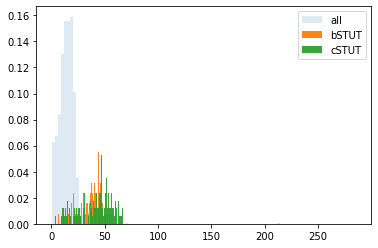

In [48]:
# gen met
bins = 100 #numpy.linspace(min(), 10, 100)

plt.hist(combo2['mean_frequency'], weights=np.ones(len(combo2['mean_frequency'])) / len(combo2['mean_frequency']), bins=bins, alpha=0.15, label='all')
plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

plt.legend(loc='upper right')
plt.show()

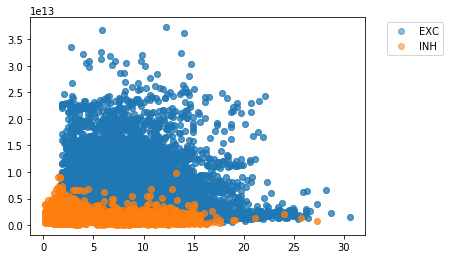

In [32]:
groups = combo3.groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.mean_frequency, group.deltaATPnumMolecules, marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [49]:
combo3.columns

Index(['deltaATPconc', 'x', 'y', 'z', 'synapse_class', 'etype', 'mtype',
       'me_combo', 'layer', 'morph_class', 'c_gid_x', 'rank_x', 'idxm',
       'current_ina', 'const006', 'const_73', 'nais_mean', 'const139',
       'current_ik', 'const41', 'pAKTPFK2', 'atpi_mean', 'constvm27',
       'cais_mean', 'mito_scale', 'glutamatergic_gaba_scaling',
       'with_met_ATP_n', 'mean_frequency', 'c_gid_y', 'rank_y',
       'cells_volumes_um3', 'cells_areas', 'deltaATPnumMolecules'],
      dtype='object')

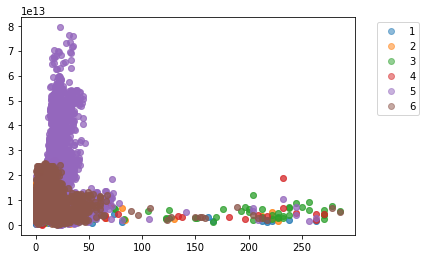

In [47]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMoleculesArea'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

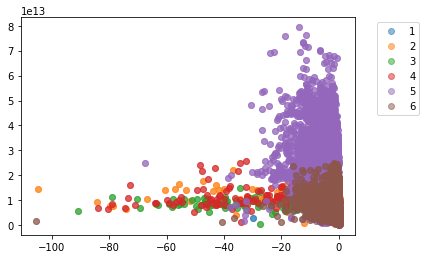

In [48]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'deltaATPnumMoleculesArea'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

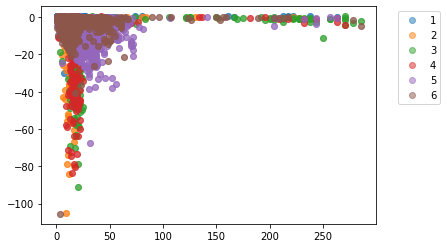

In [57]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'current_ina'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

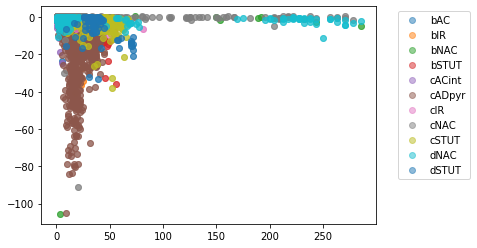

In [58]:
groups = combo3.loc[combo3['idxm']==0].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'current_ina'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

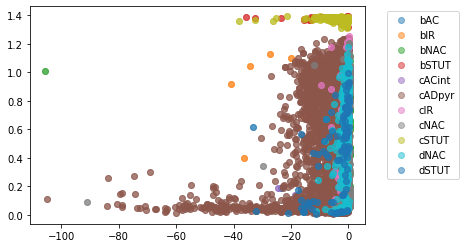

In [59]:
groups = combo3.loc[combo3['idxm']==0].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

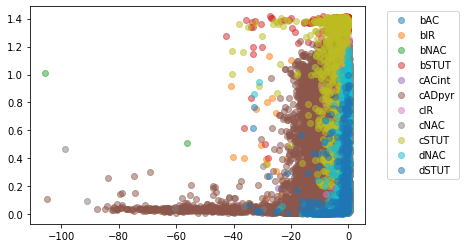

In [74]:
groups = combo3.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

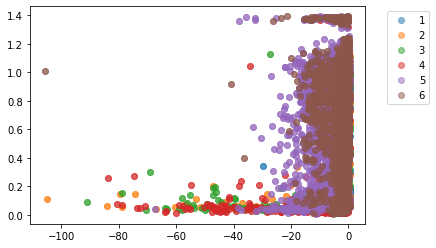

In [60]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

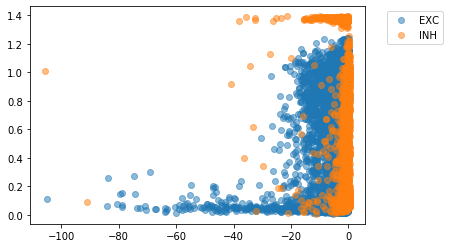

In [73]:
groups = combo3.loc[combo3['idxm']==0].groupby('synapse_class')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'current_ina'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

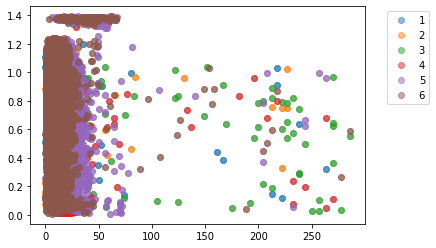

In [56]:
groups = combo3.loc[combo3['idxm']==0].groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

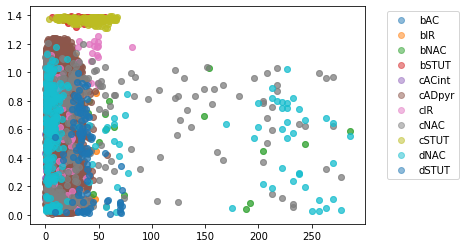

In [55]:
groups = combo3.loc[combo3['idxm']==0].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

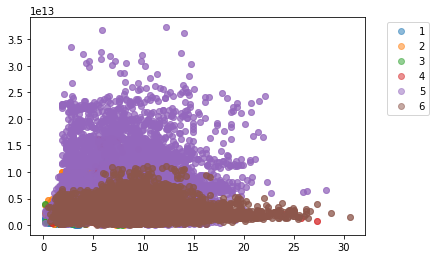

In [33]:
groups = combo3.groupby('layer')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [56]:
combo3.columns

Index(['deltaATPconc', 'x', 'y', 'z', 'synapse_class', 'etype', 'mtype',
       'me_combo', 'layer', 'c_gid_x', 'mean_frequency', 'c_gid_y', 'rank',
       'cells_volumes_um3', 'cells_areas', 'deltaATPnumMolecules'],
      dtype='object')

In [61]:
combo3['etype_mtype'] = combo3['etype'].astype(str) + "_" + combo3['mtype'].astype(str)

In [62]:
len(combo3['etype_mtype'].unique())

202

In [36]:
len(onepercent_gids)

230

In [38]:
len(combo3)

45772

In [63]:
combo3 = combo3.drop_duplicates(keep='first')
len(combo3)

113545

In [64]:
combo1per = combo3.loc[combo3.index.isin(onepercent_gids)]
len(combo1per)

1130

In [ ]:
combo1per['atpi_mean']

In [68]:
combo1per = combo1per.loc[combo1per['idxm']==0,:]

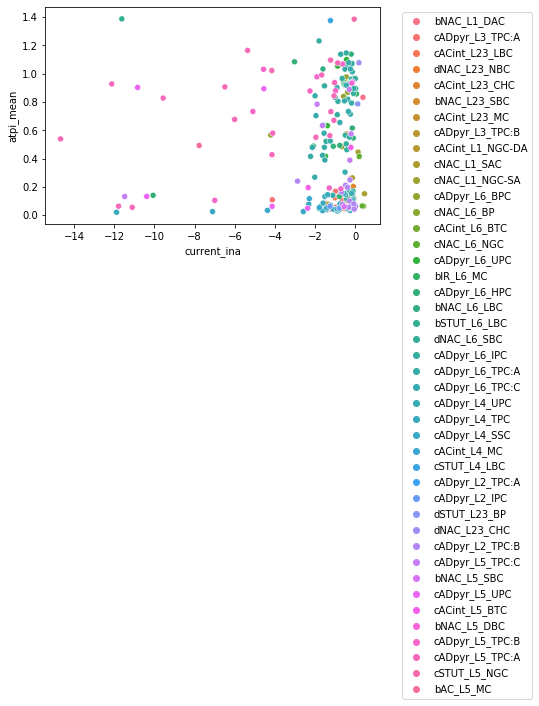

In [71]:
color_labels = combo1per['etype_mtype'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("flare", len(color_labels)).as_hex()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

#plt.plot(combo3.loc[:,'mean_frequency'], combo3.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, alpha=0.5, c=combo3['etype_mtype'].map(color_map))


ax = sns.scatterplot(data = combo1per.loc[combo1per['current_ina']>-15,:], x='current_ina',y='atpi_mean',hue='etype_mtype') #,palette='flare'


#groups = combo3.groupby('etype_mtype')
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in groups:
#    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

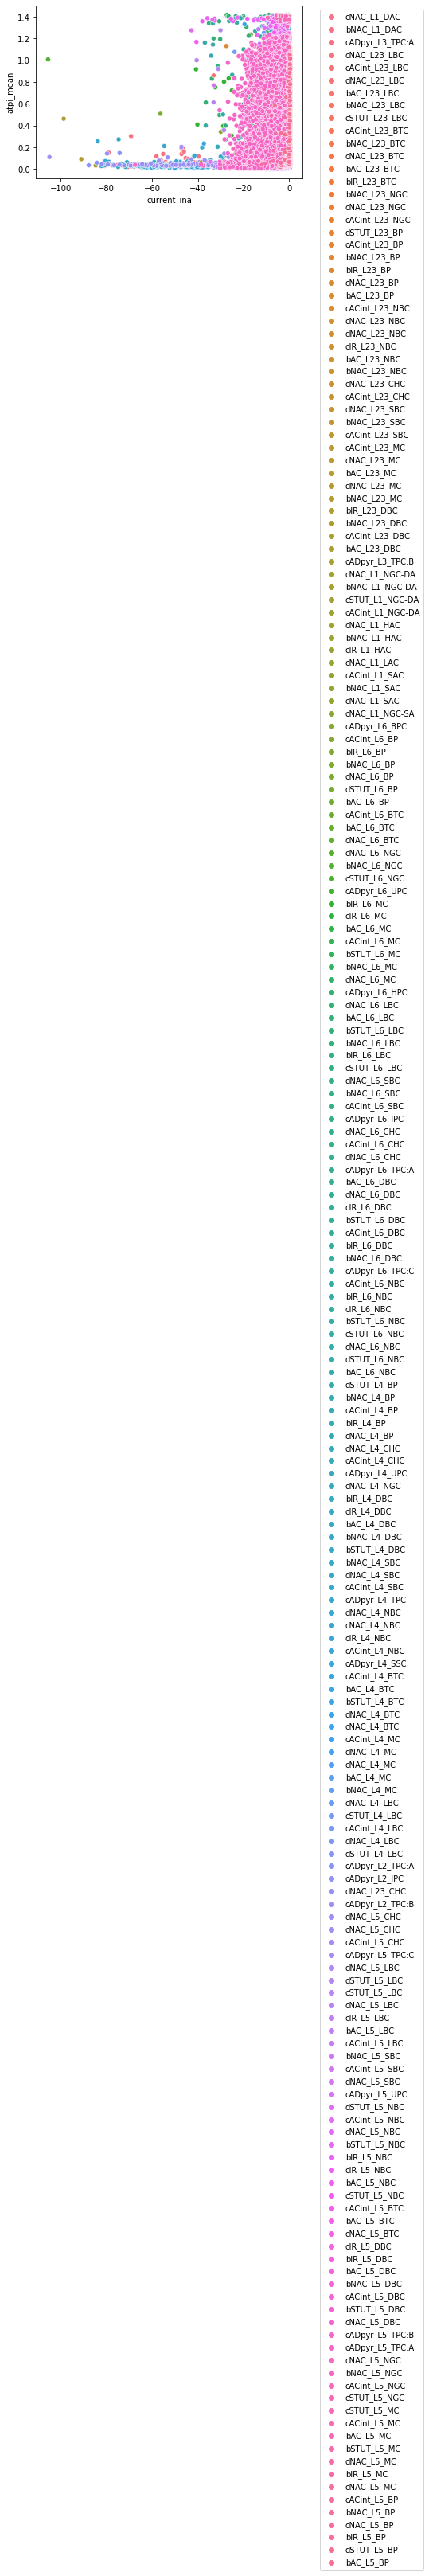

In [75]:
color_labels = combo3['etype_mtype'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("flare", len(color_labels)).as_hex()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

#plt.plot(combo3.loc[:,'mean_frequency'], combo3.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, alpha=0.5, c=combo3['etype_mtype'].map(color_map))


ax = sns.scatterplot(data = combo3, x='current_ina',y='atpi_mean',hue='etype_mtype') #,palette='flare'


#groups = combo3.groupby('etype_mtype')
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in groups:
#    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

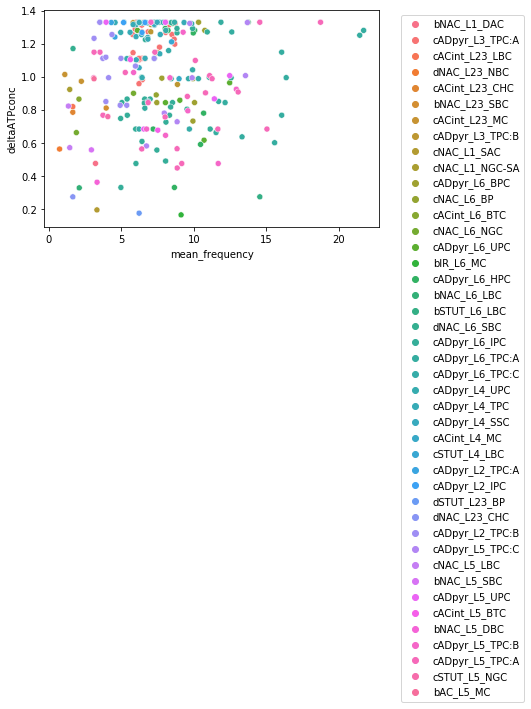

In [46]:
color_labels = combo1per['etype_mtype'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("flare", len(color_labels)).as_hex()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

#plt.plot(combo3.loc[:,'mean_frequency'], combo3.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, alpha=0.5, c=combo3['etype_mtype'].map(color_map))


ax = sns.scatterplot(data = combo1per, x='mean_frequency',y='deltaATPconc',hue='etype_mtype') #,palette='flare'


#groups = combo3.groupby('etype_mtype')
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in groups:
#    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

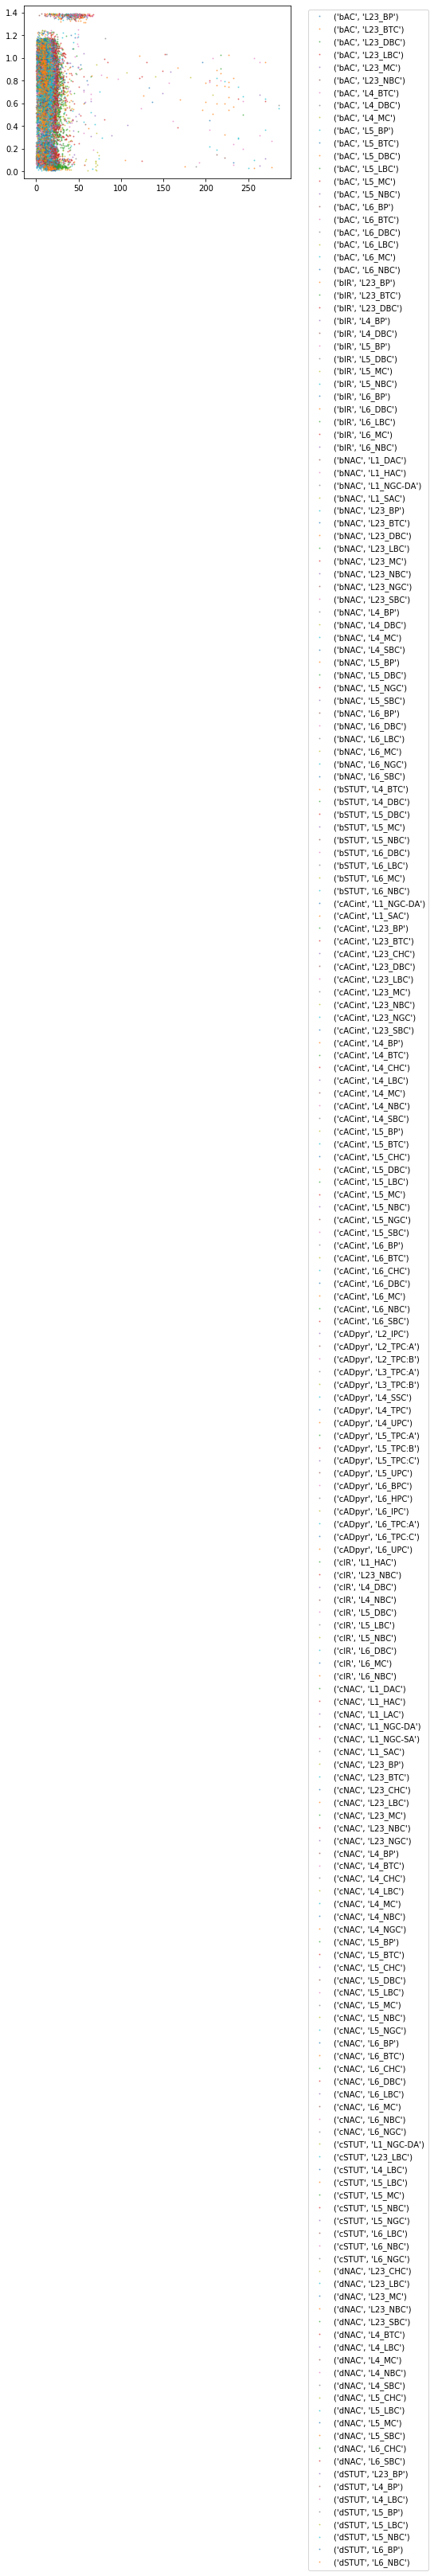

In [79]:
groups = combo3.loc[combo3['idxm']==0].groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'atpi_mean'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

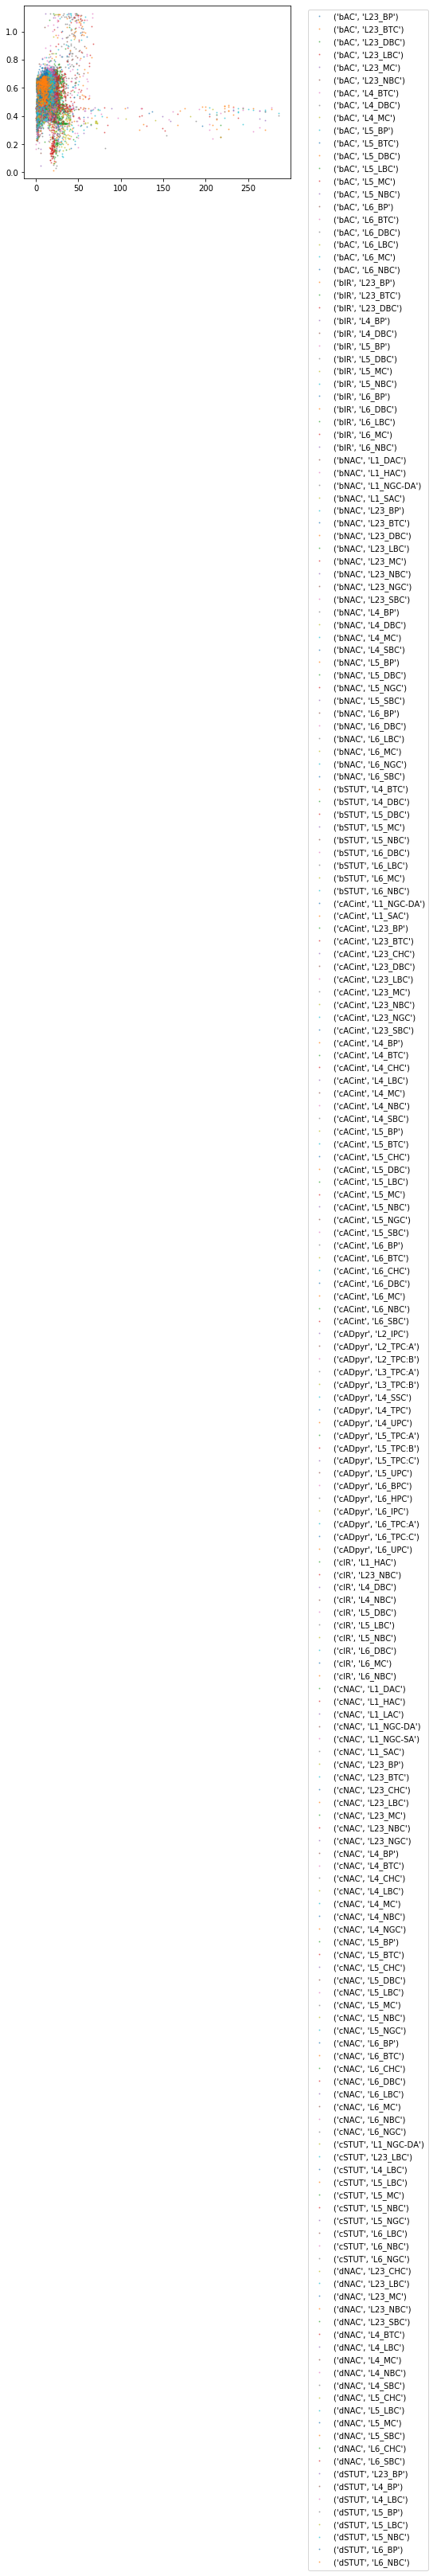

In [80]:
groups = combo3.loc[combo3['idxm']==0].groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPconc'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

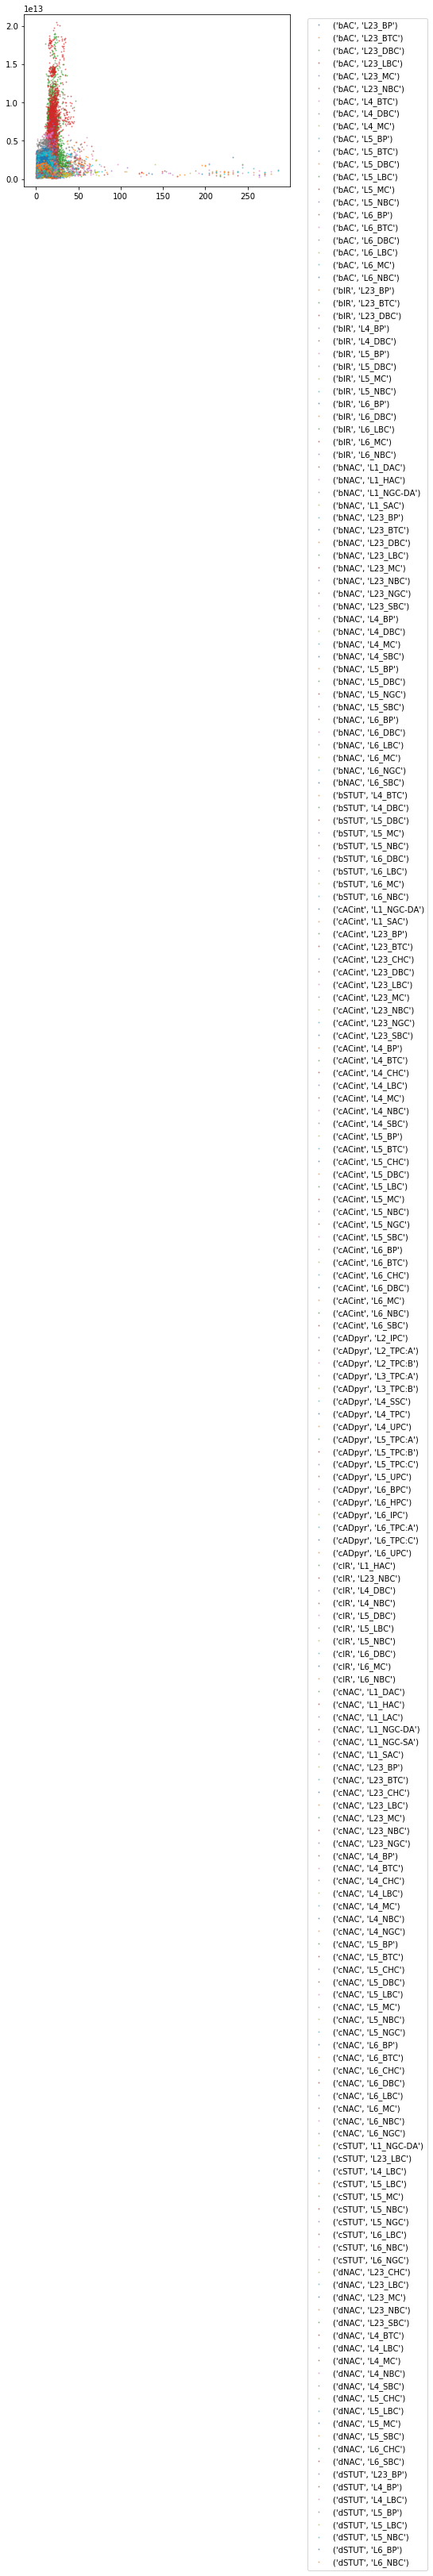

In [78]:
groups = combo3.loc[combo3['idxm']==0].groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

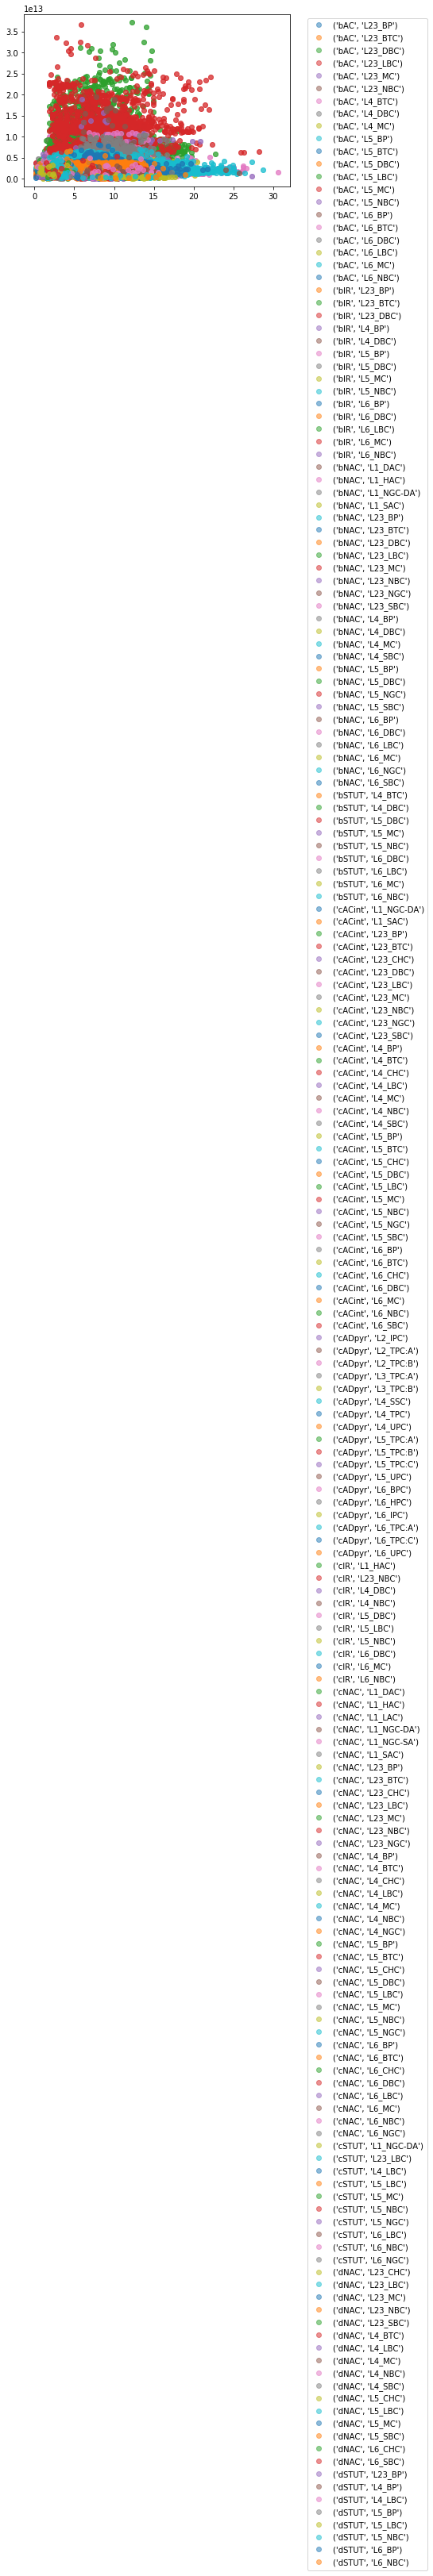

In [55]:
groups = combo3.groupby(['etype','mtype'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=2, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [45]:
combo3.loc[(combo3['mtype']=='L5_MC'),'etype'].unique()

[cSTUT, cACint, bAC, bSTUT, dNAC, bIR, cNAC]
Categories (7, object): [cSTUT, cACint, bAC, bSTUT, dNAC, bIR, cNAC]

In [37]:
combo3.columns

Index(['deltaATPconc', 'x', 'y', 'z', 'synapse_class', 'etype', 'mtype',
       'me_combo', 'layer', 'c_gid_x', 'mean_frequency', 'c_gid_y', 'rank',
       'cells_volumes_um3', 'cells_areas', 'deltaATPnumMolecules'],
      dtype='object')

In [39]:
c.cells.available_properties

{'etype',
 'layer',
 'me_combo',
 'morph_class',
 'morphology',
 'mtype',
 'orientation',
 'region',
 'synapse_class',
 'x',
 'y',
 'z'}

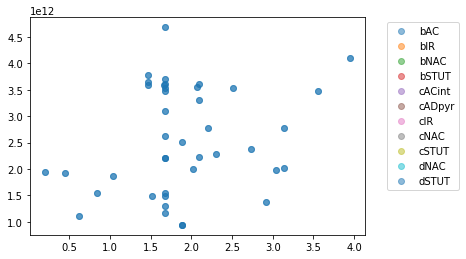

In [54]:
groups = combo3.loc[(combo3['etype']=='bAC') & (combo3['mtype']=='L5_MC'),:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [47]:
np.corrcoef(combo3.loc[(combo3['etype']=='bAC') & (combo3['mtype']=='L5_MC'),'mean_frequency'], combo3.loc[(combo3['etype']=='bAC') & (combo3['mtype']=='L5_MC'),'deltaATPnumMolecules'],'spearman')


array([[1.        , 0.23182497],
       [0.23182497, 1.        ]])

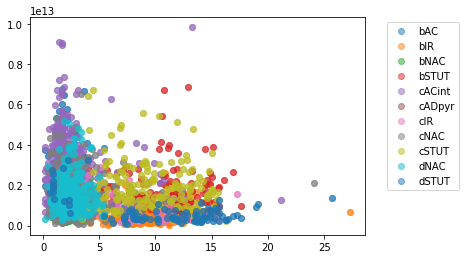

In [102]:
groups = combo3.loc[combo3['etype']!='cADpyr'].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[:,'mean_frequency'], group.loc[:,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

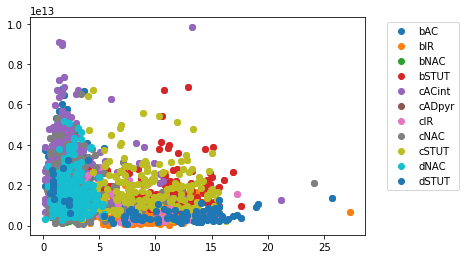

In [100]:
groups = combo3.loc[combo3['etype']!='cADpyr'].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

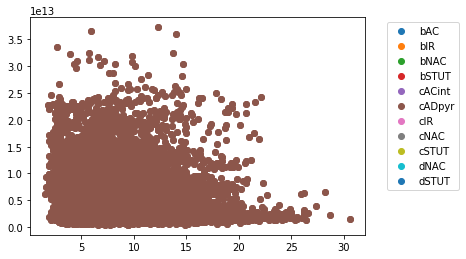

In [101]:
groups = combo3.loc[combo3['etype']=='cADpyr'].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.loc[group['mean_frequency']<50,'mean_frequency'], group.loc[group['mean_frequency']<50,'deltaATPnumMolecules'], marker='.', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()